# Check Reyes channel weights

author: steeve.laquitaine@epfl.ch  
generous feedbacks from: joseph.tharayil@epfl.ch

Analyzing channel weight files to select desired channels.

In [1]:
import os
import h5py
from matplotlib import pyplot as plt
import numpy as np

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.io.silico.loading import load_campaign_params
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells
from src.nodes import viz


# SET PARAMETERS
SIMULATION_DATE = "2023_01_13"
EXP = "supp/silico_reyes"
N_CONTACTS = 128
N_CONTACTS_TO_KEEP = 32
CONTACTS_TO_KEEP = np.arange(48, 80)

# SETUP EXPERIMENT CONFIG
data_conf, param_conf = get_config(EXP, SIMULATION_DATE).values()


# GET PATHS
WEIGHT_PATH = data_conf["dataeng"]["chunks"]["input"]["weight"]

In [ ]:
# read weight file
weights = h5py.File(WEIGHT_PATH, "r")

# describe keys
print("\nWeight keys:", weights.keys())


Weight keys: <KeysViewHDF5 ['electrodes', 'neuron_ids', 'offsets', 'sec_ids']>


`neuron_ids` does not contain channel information.

In [3]:
# describe neuron_ids key type
print("neuron_ids (type):", type(weights["neuron_ids"]))

# shape
print("neuron_ids (count):", weights["neuron_ids"].shape)

neuron_ids (type): <class 'h5py._hl.dataset.Dataset'>
neuron_ids (count): (211712,)


`offsets` does not contain channel information

In [5]:
# describe "offsets" type
print("offsets (type):", type(weights["offsets"]))

# count "offsets" component keys --> returns 211,712 neurons (stats: takes 40)
print("offsets (count):", len(weights["offsets"].keys()))

offsets (type): <class 'h5py._hl.group.Group'>
offsets (count): 211712


In [7]:
# get type of offset components
print("'1000036' (type):", type(weights["offsets"]["1000036"]))

# get shape
print("offsets (shape):", weights["offsets"]["1000036"].shape)

'1000036' (type): <class 'h5py._hl.dataset.Dataset'>
offsets (shape): (106,)


`sec_ids` does not contain channel information

In [8]:
# get type of "sec_ids"
print("sec_ids (type):", type(weights["sec_ids"]))

# count components --> returns 211,712 neurons (stats: takes 1 min)
print("sec_ids (cell count):", len(weights["sec_ids"].keys()))

# count a neuron's component
print("'1000036' (shape):", weights["sec_ids"]["1000036"].shape)

sec_ids (type): <class 'h5py._hl.group.Group'>
sec_ids (cell count): 211712
'1000036' (shape): (337,)


Channel information is contained in `electrodes`.  The channel contacts are arranged in the columns of `weights["electrodes"]["electrode_grid"]`.

I should select the subset of columns associated with the contacts needed.

In [9]:
# describe "electrodes" structure type (see 1 for "group" type)
print("\nElectrodes (type):", type(weights["electrodes"]))

# describe electrodes group keys
print("\nElectrodes:\n-", list(weights["electrodes"].keys())[:10], "...")
print("-", list(weights["electrodes"].keys())[-1])

# describe "electrode_grid"
print(
    "\nelectrode_grid:\n- type:",
    weights["electrodes"].get("electrode_grid", getclass=True),
)
print("- shape:", weights["electrodes"]["electrode_grid"]["1000036"].shape)

## count "electrode_grid" component keys (stats: takes 10 min) -> returns 211,712 neurons
# print("\n",len(weights["electrodes"]["electrode_grid"].keys()))
# weights["electrodes"]["electrode_grid"].visititems(print)


Electrodes (type): <class 'h5py._hl.group.Group'>

Electrodes:
- ['electrode_grid', 'reyespuerta_0', 'reyespuerta_1', 'reyespuerta_10', 'reyespuerta_100', 'reyespuerta_101', 'reyespuerta_102', 'reyespuerta_103', 'reyespuerta_104', 'reyespuerta_105'] ...
- reyespuerta_99

electrode_grid:
- type: <class 'h5py._hl.group.Group'>
- shape: (337, 128)


## Select contacts
To select/delete contacts, we must keep or delete the associated metadata e.g.,"Neuropixels-384_0" in `weights["electrodes"]` and the contact columns of each neurons matrix in e.g., `weights["electrodes"]["electrode_grid"]["1000036"]` for e.g., neuron "1000036" that we want.

In [10]:
# analye electrodes components
print("\reyespuerta_0:\n-type:", type(weights["electrodes"]))
print(
    "\reyespuerta_0 components:\n-type:", weights["electrodes"]["reyespuerta_0"].keys()
)
print("\nlayer:\n-type:", type(weights["electrodes"]["reyespuerta_0"]["layer"]))
print("-shape:", weights["electrodes"]["reyespuerta_0"]["layer"].shape)

print("\nlocation:\n-type:", type(weights["electrodes"]["reyespuerta_0"]["location"]))
print("-type:", weights["electrodes"]["reyespuerta_0"]["location"].shape)
print("-content:", weights["electrodes"]["reyespuerta_0"]["location"][:])

print("\noffset:\n-type:", type(weights["electrodes"]["reyespuerta_0"]["offset"]))
print("-shape:", weights["electrodes"]["reyespuerta_0"]["offset"].shape)

print("\nregion:\n-type:", type(weights["electrodes"]["reyespuerta_0"]["region"]))
print("-shape:", weights["electrodes"]["reyespuerta_0"]["region"].shape)

print("\ntype:\n-type:", type(weights["electrodes"]["reyespuerta_0"]["type"]))
print("-shape:", weights["electrodes"]["reyespuerta_0"]["type"].shape)

eyespuerta_0:
-type: <class 'h5py._hl.group.Group'>
eyespuerta_0 components:
-type: <KeysViewHDF5 ['layer', 'location', 'offset', 'region', 'type']>

layer:
-type: <class 'h5py._hl.dataset.Dataset'>
-shape: ()

location:
-type: <class 'h5py._hl.dataset.Dataset'>
-type: (3,)
-content: [ 3333.81242423 -1841.70092968 -2941.78131262]

offset:
-type: <class 'h5py._hl.dataset.Dataset'>
-shape: ()

region:
-type: <class 'h5py._hl.dataset.Dataset'>
-shape: ()

type:
-type: <class 'h5py._hl.dataset.Dataset'>
-shape: ()


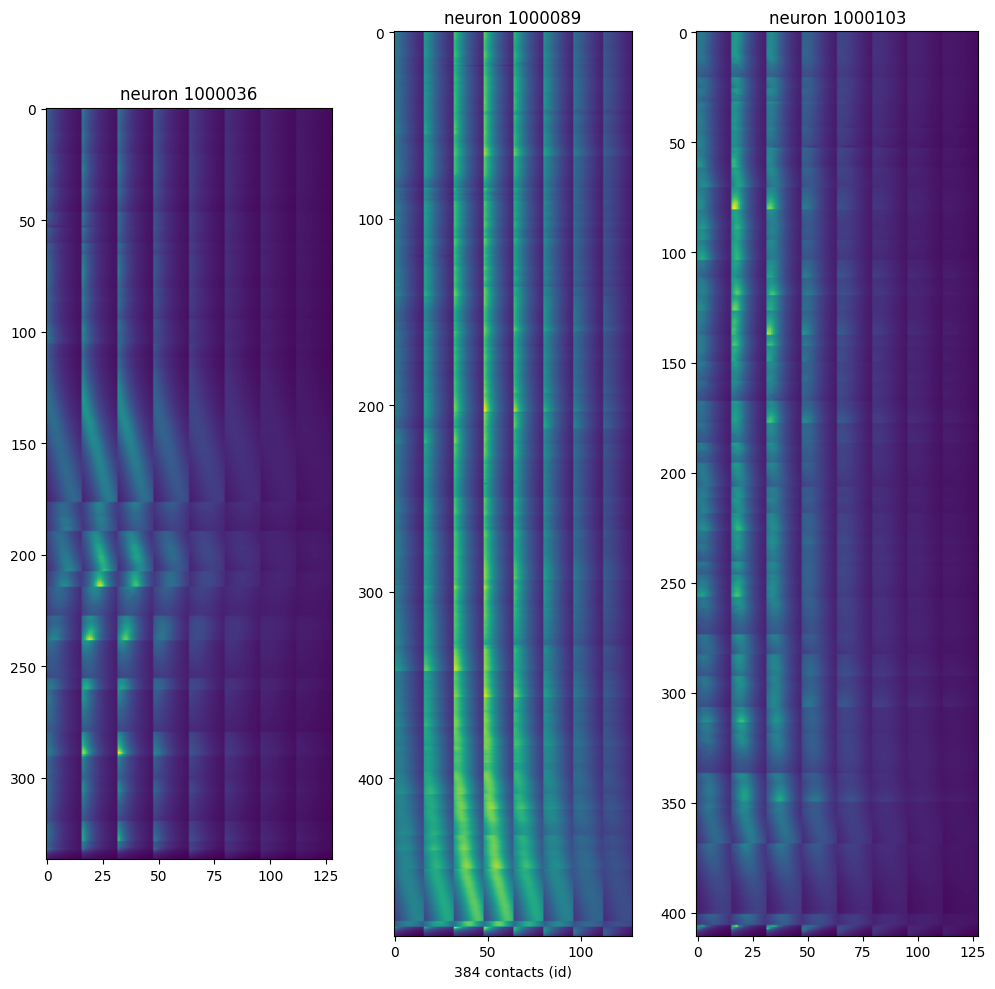

In [11]:
# plot channel contact channel weights
figures, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(weights["electrodes"]["electrode_grid"]["1000036"][:, :])
axes[0].set_title("neuron 1000036")
axes[1].imshow(weights["electrodes"]["electrode_grid"]["1000089"][:, :])
axes[1].set_title("neuron 1000089")
axes[1].set_xlabel("384 contacts (id)")
axes[2].imshow(weights["electrodes"]["electrode_grid"]["1000103"][:, :])
axes[2].set_title("neuron 1000103")
plt.tight_layout()

## Select 32 contacts that span most layers

To improve visibility, we projected all coordinates on the x-y plane.

In [12]:
# test the number of contacts
assert (
    N_CONTACTS == weights["electrodes"]["electrode_grid"]["1000036"].shape[1]
), "The number of contacts is unexpected"

# set contacts ids
all_contacts_ids = np.arange(0, N_CONTACTS)

# get all contact locations
all_contact_locations = []
for all_contact_i in all_contacts_ids:
    all_contact_locations.append(
        eval(
            f"""weights["electrodes"]["reyespuerta_{all_contact_i}"]["location"][:]"""
        ).tolist()
    )
all_contact_locations = np.array(all_contact_locations)

In [13]:
# Get microcircuit sample cell coordinates
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(
    n=1000, axis=0, random_state=1
)

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:51: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  Bool8 = np.bool8
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:54: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  Object0 = np.object0
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:66: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Int0 = np.int0
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_silico/lib/python3.9/site-packages/nptyping/typing_.py:80: DeprecationWarning: `np.uint0` is a deprecated alias for `np.uin

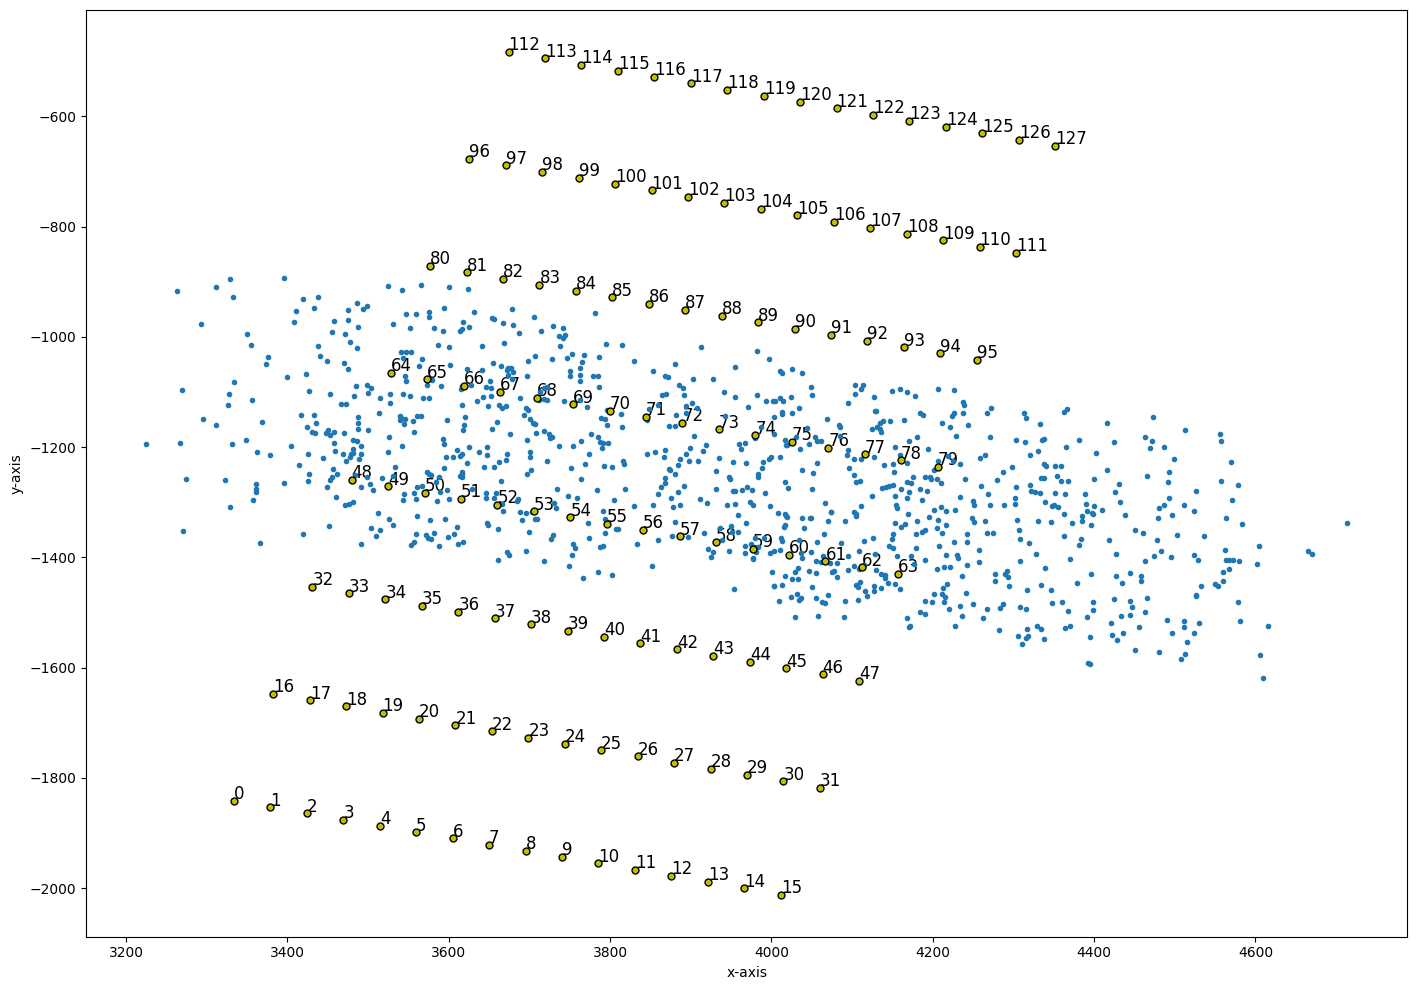

In [16]:
# angle view 4
fig = plt.figure(figsize=(70, 10))
ax = fig.add_subplot(154)
ax.plot(
    microcircuit_coord.x,
    microcircuit_coord.y,
    ".",
)
ax.plot(
    all_contact_locations[:, 0],
    all_contact_locations[:, 1],
    marker=".",
    markersize=10,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# annotate contacts with their ids
for ix in range(len(all_contact_locations)):
    ax.text(
        all_contact_locations[ix, 0],
        all_contact_locations[ix, 1] + 3,
        "%s" % (str(all_contacts_ids[ix])),
        size=12,
        zorder=1,
        color="k",
    )
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.tight_layout()
plt.show()

We calculated the euclidean distance between two nearest horizontal (x_pitch) and vertical (y_pitch) contacts:

In [17]:
def euclidean_distance(coord_1, coord_2):
    return np.sqrt(np.sum((coord_1 - coord_2) ** 2))


# get y_pitch (distance between the two closest contacts within the same column)
y_pitch = euclidean_distance(all_contact_locations[0, :], all_contact_locations[1, :])
print("y_pitch", y_pitch)

# get x_pitch (distance between the two closest contacts in two parallel columns)
x_pitch = euclidean_distance(all_contact_locations[0, :], all_contact_locations[96, :])
print("x_pitch", x_pitch)

y_pitch 75.00000000000009
x_pitch 1200.0


In [18]:
cell_layers = simulation["circuit"].cells.get(
    group=microcircuit["gid"], properties="layer"
)

In [20]:
# test number of contacts
assert (
    len(list(weights["electrodes"].keys())[:-1]) == N_CONTACTS
), "number of contacts do not match expectation"

selected_contacts_coords = []
for contact_i in CONTACTS_TO_KEEP:
    selected_contacts_coords.append(
        eval(
            f"""weights["electrodes"]["reyespuerta_{contact_i}"]["location"][:]"""
        ).tolist()
    )
selected_contacts_coords = np.array(selected_contacts_coords)

# plot
# fig = viz.plot_neuropixel_probe_with_circuit(microcircuit_coord, selected_contacts_coords)
# fig = viz.plot_neuropixel_probe_with_circuit(filtered["soma_location"], filtered_contact_locations)

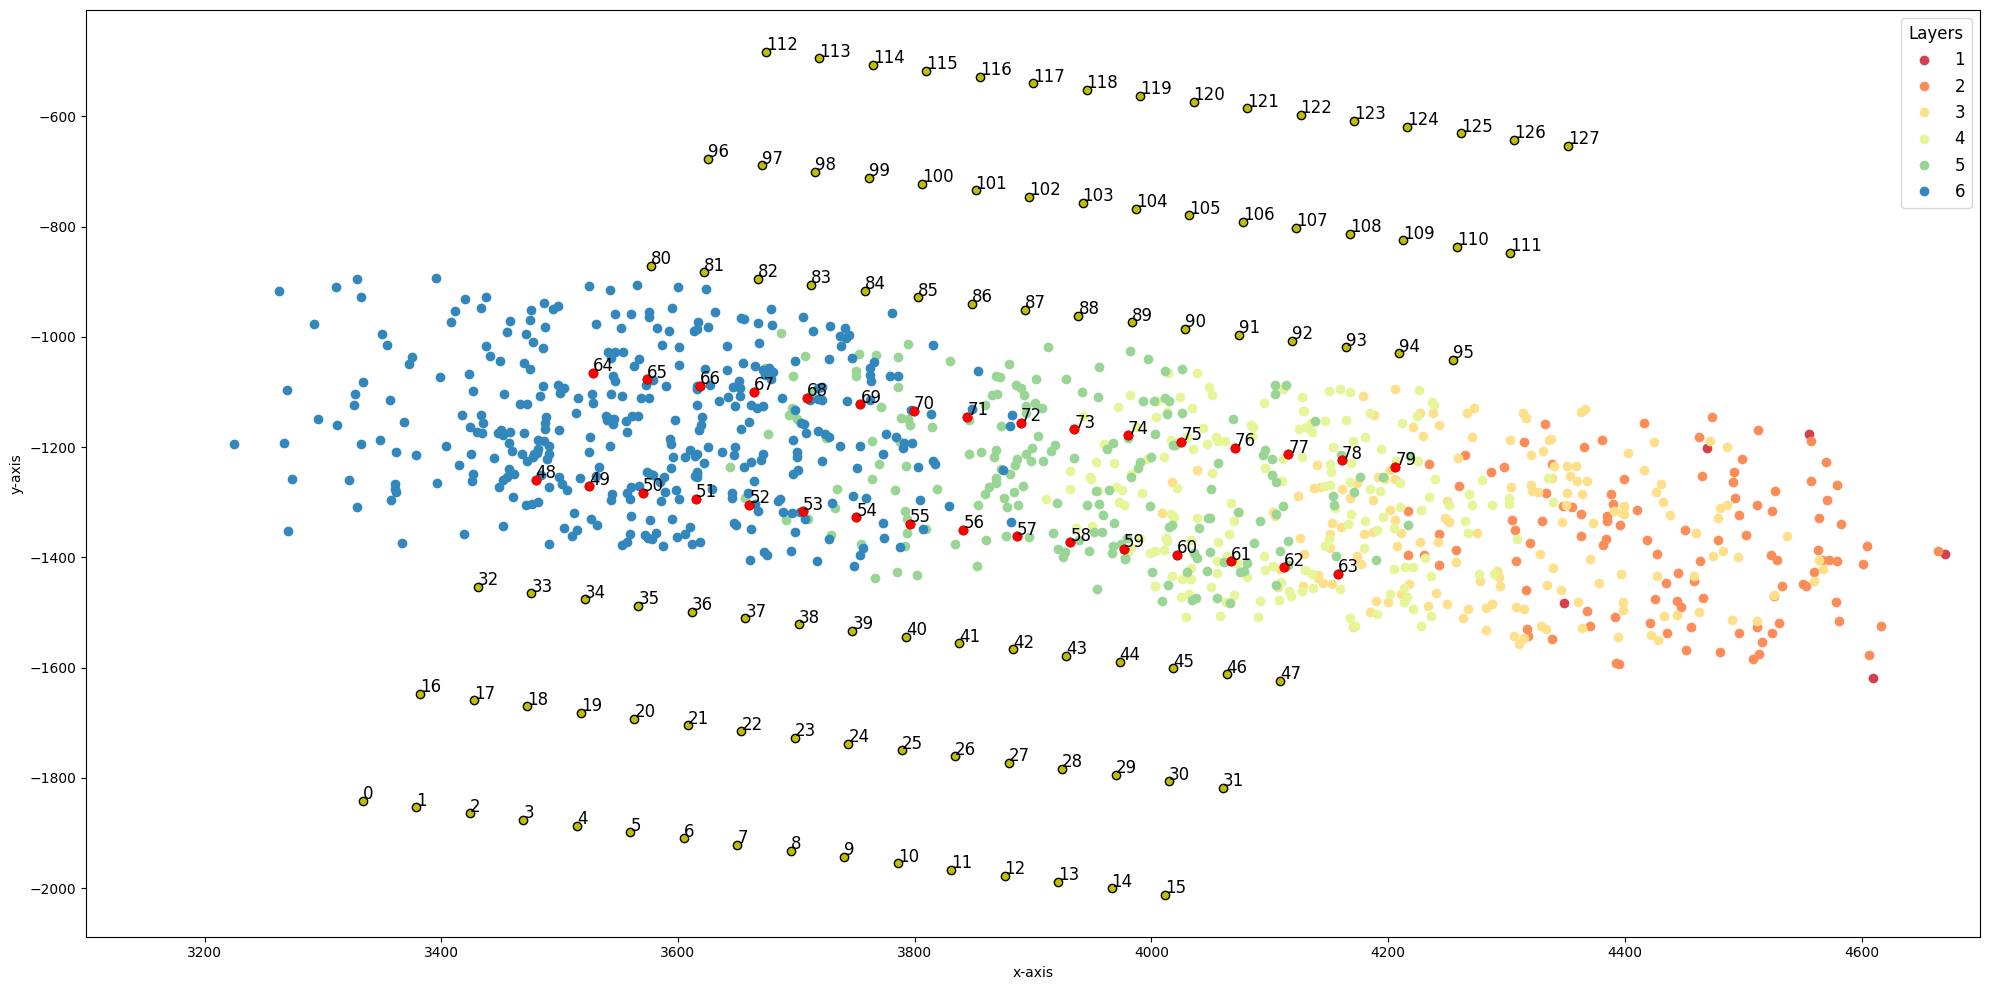

In [22]:
# angle view 4
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.y[cell_layers == layer_i],
        ".",
        color=layer_color[layer_i],
        markersize=12,
    )

# add contacts
ax.plot(
    all_contact_locations[:, 0],
    all_contact_locations[:, 1],
    marker=".",
    markersize=12,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# add selected contacts
ax.plot(
    selected_contacts_coords[:, 0],
    selected_contacts_coords[:, 1],
    marker=".",
    markersize=12,
    color="r",
    markeredgecolor="r",
    linestyle="None",
)

# add contact ids
for ix in range(len(all_contact_locations)):
    ax.text(
        all_contact_locations[ix, 0],
        all_contact_locations[ix, 1] + 3,
        "%s" % (str(all_contacts_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_xlim([3100, 4700])
plt.tight_layout()
legend = ax.legend(layers, fontsize=12, title="Layers")
plt.setp(legend.get_title(), fontsize=12)
plt.show()

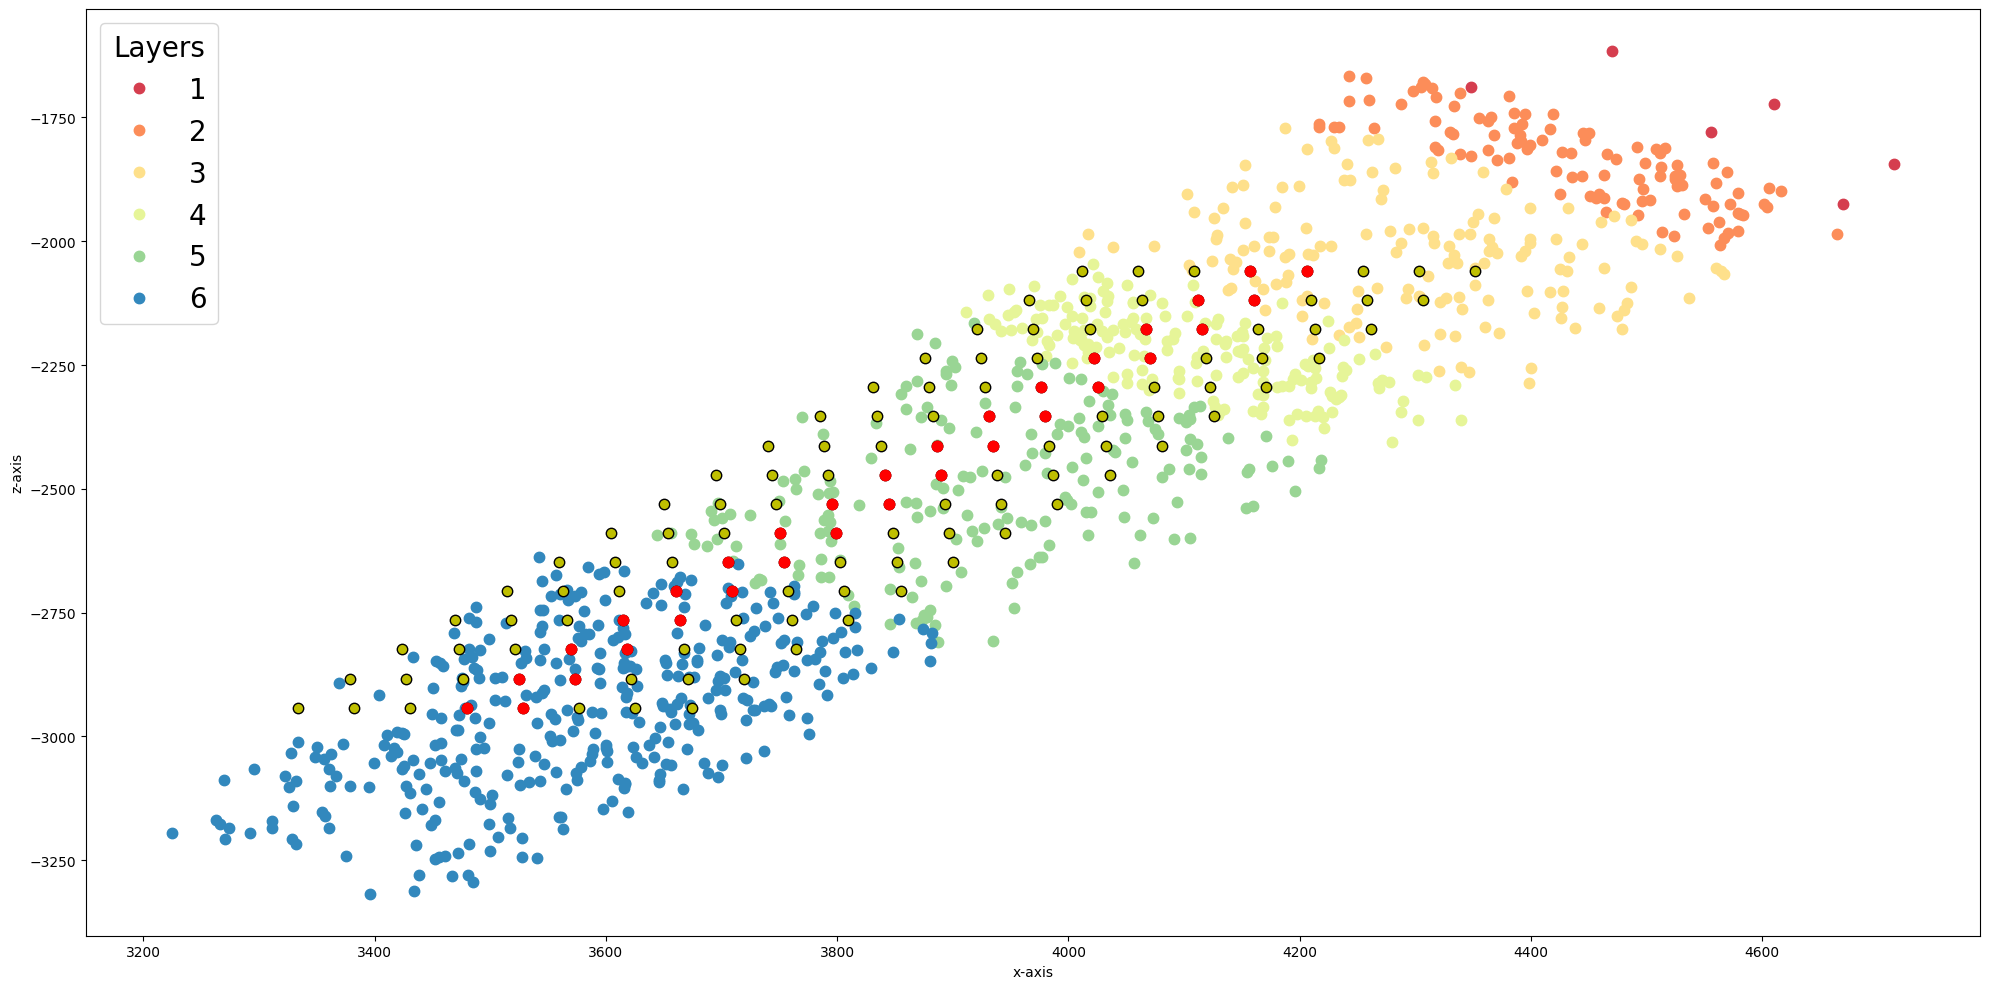

In [23]:
# setup plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0, 0, 0),
    (213 / 255, 62 / 255, 79 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (254 / 255, 224 / 255, 139 / 255),
    (230 / 255, 245 / 255, 152 / 255),
    (153 / 255, 213 / 255, 148 / 255),
    (50 / 255, 136 / 255, 189 / 255),
]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers == layer_i],
        microcircuit_coord.z[cell_layers == layer_i],
        ".",
        color=layer_color[layer_i],
        markersize=15,
    )

# add contacts
ax.plot(
    all_contact_locations[:, 0],
    all_contact_locations[:, 2],
    marker=".",
    markersize=15,
    color="y",
    markeredgecolor="black",
    linestyle="None",
)

# add selected contacts
ax.plot(
    selected_contacts_coords[:, 0],
    selected_contacts_coords[:, 2],
    marker=".",
    markersize=15,
    color="r",
    markeredgecolor="r",
    linestyle="None",
)

ax.set_xlabel("x-axis")
ax.set_ylabel("z-axis")
plt.tight_layout()
legend = ax.legend(layers, fontsize=20, title="Layers")
plt.setp(legend.get_title(), fontsize=20)
plt.show()

## Check all contacts arrangements

notes:

Objects can be deleted from the file using the standard syntax:  del subgroup["MyDataset"]

```python
# create a new group
.require_group()

# create dataset
.create_dataset()
```
 


# references

(1) https://docs.h5py.org/en/latest/high/group.html